In [25]:
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import PIL
from PIL import Image as im
import numpy as np
import matplotlib.pyplot as plt
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
	(1, 1, 1, 0, 1, 1, 1): 0,
	(0, 0, 1, 0, 0, 1, 0): 1,
	(1, 0, 1, 1, 1, 1, 0): 2,
	(1, 0, 1, 1, 0, 1, 1): 3,
	(0, 1, 1, 1, 0, 1, 0): 4,
	(1, 1, 0, 1, 0, 1, 1): 5,
	(1, 1, 0, 1, 1, 1, 1): 6,
	(1, 0, 1, 0, 0, 1, 0): 7,
	(1, 1, 1, 1, 1, 1, 1): 8,
	(1, 1, 1, 1, 0, 1, 1): 9
}

In [26]:
image = cv2.imread("C:/Users/User/Downloads/w1.jpeg")
# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#edged = cv2.Canny(blurred, 50, 200, 255)
edged = cv2.Canny(blurred, 50, 200, 255)

In [27]:
data233 = im.fromarray(image)
data233 = im.fromarray(gray)

In [29]:
im = data233
 
# Setting the points for cropped image
left = 380
top = 180
right = 593
bottom = 280
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.show()

In [30]:
im_data = np.asarray(im1)

In [31]:
cnts = cv2.findContours(im_data, cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if the contour has four vertices, then we have found
    # the thermostat display
    if len(approx) == 4:
        displayCnt = approx
        break

In [32]:
warped = four_point_transform(im_data, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

In [33]:
thresh = cv2.threshold(warped, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [34]:
from PIL import Image 
from matplotlib import cm
imm = Image.fromarray(np.uint8(cm.gist_earth(thresh)*250))

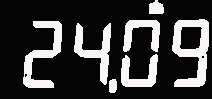

In [35]:
imm

In [36]:
w,h= imm.size

In [37]:
w

212

In [38]:
h

99

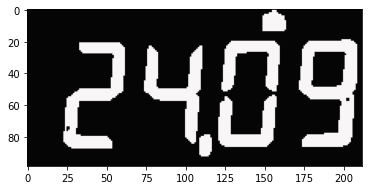

In [39]:
plt.imshow(imm)

In [40]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []
# loop over the digit area candidates
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# if the contour is sufficiently large, it must be a digit
	if w >= 15 and (h >= 55 and h <= 95):
		digitCnts.append(c)

In [41]:
cnts

(array([[[112,  79]],
 
        [[111,  80]],
 
        [[110,  80]],
 
        [[109,  81]],
 
        [[109,  91]],
 
        [[110,  92]],
 
        [[114,  92]],
 
        [[115,  91]],
 
        [[115,  90]],
 
        [[116,  89]],
 
        [[116,  81]],
 
        [[115,  80]],
 
        [[115,  79]]], dtype=int32),
 array([[[155,  54]],
 
        [[154,  55]],
 
        [[153,  55]],
 
        [[150,  58]],
 
        [[150,  63]],
 
        [[149,  64]],
 
        [[149,  74]],
 
        [[148,  75]],
 
        [[148,  78]],
 
        [[147,  79]],
 
        [[129,  79]],
 
        [[128,  78]],
 
        [[128,  67]],
 
        [[129,  66]],
 
        [[129,  58]],
 
        [[126,  55]],
 
        [[125,  55]],
 
        [[125,  57]],
 
        [[124,  58]],
 
        [[123,  58]],
 
        [[122,  59]],
 
        [[122,  67]],
 
        [[121,  68]],
 
        [[121,  82]],
 
        [[122,  83]],
 
        [[122,  84]],
 
        [[123,  85]],
 
        [[124,  85]],
 
   

In [42]:
digitCnts = contours.sort_contours(digitCnts,method="left-to-right")[0]
digits = []

In [43]:
digitCnts

(array([[[33, 21]],
 
        [[33, 25]],
 
        [[35, 27]],
 
        [[53, 27]],
 
        [[55, 29]],
 
        [[55, 30]],
 
        [[54, 31]],
 
        [[54, 42]],
 
        [[53, 43]],
 
        [[53, 49]],
 
        [[52, 50]],
 
        [[33, 50]],
 
        [[31, 52]],
 
        [[30, 52]],
 
        [[27, 55]],
 
        [[26, 55]],
 
        [[25, 56]],
 
        [[25, 61]],
 
        [[24, 62]],
 
        [[24, 76]],
 
        [[23, 77]],
 
        [[23, 83]],
 
        [[26, 86]],
 
        [[27, 86]],
 
        [[28, 87]],
 
        [[53, 87]],
 
        [[53, 83]],
 
        [[50, 80]],
 
        [[34, 80]],
 
        [[33, 79]],
 
        [[31, 79]],
 
        [[30, 78]],
 
        [[30, 75]],
 
        [[31, 74]],
 
        [[31, 62]],
 
        [[32, 61]],
 
        [[32, 58]],
 
        [[33, 57]],
 
        [[52, 57]],
 
        [[54, 55]],
 
        [[55, 55]],
 
        [[58, 52]],
 
        [[59, 52]],
 
        [[60, 51]],
 
        [[60, 42]],
 
        [[

In [44]:
for c in digitCnts:
	# extract the digit ROI
	(x, y, w, h) = cv2.boundingRect(c)
	roi = thresh[y:y + h, x:x + w]
	# compute the width and height of each of the 7 segments
	# we are going to examine
	(roiH, roiW) = roi.shape
	(dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
	dHC = int(roiH * 0.05)
	# define the set of 7 segments
	segments = [
		((0, 0), (w, dH)),	# top
		((0, 0), (dW, h // 2)),	# top-left
		((w - dW, 0), (w, h // 2)),	# top-right
		((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
		((0, h // 2), (dW, h)),	# bottom-left
		((w - dW, h // 2), (w, h)),	# bottom-right
		((0, h - dH), (w, h))	# bottom
	]
	on = [0] * len(segments)

In [45]:
	# loop over the segments
	for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
		# extract the segment ROI, count the total number of
		# thresholded pixels in the segment, and then compute
		# the area of the segment
		segROI = roi[yA:yB, xA:xB]
		total = cv2.countNonZero(segROI)
		area = (xB - xA) * (yB - yA)
		# if the total number of non-zero pixels is greater than
		# 50% of the area, mark the segment as "on"
		if total / float(area) > 0.5:
			on[i]= 1
	# lookup the digit and draw it on the image
	digit = DIGITS_LOOKUP[tuple(on)]
	digits.append(digit)
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
	cv2.putText(output, str(digit), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)

array([[[ 96, 127, 142],
        [ 97, 128, 143],
        [ 97, 128, 143],
        ...,
        [110, 134, 154],
        [111, 135, 155],
        [111, 135, 155]],

       [[ 99, 130, 145],
        [ 97, 128, 143],
        [ 96, 127, 142],
        ...,
        [108, 132, 152],
        [109, 133, 153],
        [109, 133, 153]],

       [[103, 133, 150],
        [100, 131, 147],
        [ 99, 129, 146],
        ...,
        [106, 130, 150],
        [107, 131, 151],
        [107, 131, 151]],

       ...,

       [[ 89, 113, 127],
        [ 87, 110, 125],
        [ 87, 110, 125],
        ...,
        [110, 117, 114],
        [111, 117, 115],
        [111, 117, 114]],

       [[ 91, 115, 127],
        [ 90, 114, 126],
        [ 89, 113, 125],
        ...,
        [113, 118, 116],
        [113, 118, 116],
        [112, 117, 115]],

       [[ 91, 115, 127],
        [ 89, 113, 125],
        [ 89, 113, 125],
        ...,
        [115, 120, 118],
        [115, 120, 118],
        [114, 119, 117]]

In [46]:
print(u"{} \u00b0C".format(*digits))
cv2.imshow("Input", image)
cv2.imshow("Output", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

9 °C


In [47]:
roi

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       ...,
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]], dtype=uint8)

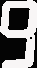

In [48]:
from PIL import Image 
from matplotlib import cm
imm3 = Image.fromarray(np.uint8(cm.gist_earth(roi)*250))
imm3

In [49]:
digit

9

In [50]:
digits

[9]

In [51]:
roi.shape

(68, 37)

In [52]:
total

263

In [53]:
area

370

In [54]:
segROI 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 2

In [55]:
dHC

3

In [38]:
from PIL import Image 
from matplotlib import cm
imm31 = Image.fromarray(np.uint8(cm.gist_earth(segROI)*250))
imm31